In [1]:
# all of the libraries neccessary for simulations
import os # used to get user path for weather file
import json # used to import the .json of SAM model
import pandas as pd # used to generate data table
import numpy as np # used to generate data table
 
# import SAM generated modules required for the 
# PV Model – No Financial Model configuration
# files needed: Pvsamv1, Grid 
import PySAM.Pvsamv1 as pv
import PySAM.Grid as gr

In [2]:
# the data that varies between each SAM simulation site

# directory to folder for specific plant
dir = os.getcwd() + "\\NIST\\"
file_names = ["NIST_PVSC_pvsamv1", "NIST_PVSC_grid"]
csv_name = 'NIST_bias' # file name to store calculated bias values

# changing number of strings to achieve
# different ILR (DC/AC ratio) Values (1.2-2.0)
num_of_strings = [111, 120, 129, 138, 147, 157, 166, 175, 184]

# empirical bias for plant
# corresponding to each ILR value
empirical = [0.17, 0.48, 1.03, 1.60, 2.14, 2.59, 2.94, 3.19, 3.35]

# all of the different weather file names
# 5 different vendors
# each with an hourly and subhourly version
v1_subhourly = "NIST_vendor1_2020_subhourly"
v1_hourly = "NIST_vendor1_2020_hourly_avg"

v2_subhourly = "NIST_vendor2_2020_subhourly"
v2_hourly = "NIST_vendor2_2020_hourly_avg"

v3_subhourly = "NIST_Vendor3_TMY_subhourly"
v3_hourly = "NIST_Vendor3_TMY_hourly_avg"

v4_subhourly = "NIST_Vendor4_TMY_subhourly"
v4_hourly = "NIST_Vendor4_TMY_hourly_avg"

v5_subhourly = "NIST_Vendor5_TMY_subhourly"
v5_hourly = "NIST_Vendor5_TMY_hourly_avg"

## DO NOT EDIT BELOW ##

# create an instance of the 
# Detailed PV Model – No Financial Model module with defaults
system_model = pv.new() #FlatPlatePVNone
grid_model = gr.from_existing(system_model)
modules = [system_model, grid_model]

# import the SAM .json data into the system and grid model
for f, m in zip(file_names, modules):
    with open(dir + f + ".json", 'r') as file:
        #print(file)
        data = json.load(file)
        # loop through each key-value pair
        for k, v in data.items():
            if k != "number_inputs":
                m.value(k, v)

In [3]:
# cycle through different ILRs for each weather file

# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v1_subhourly + ".csv")
vendor1_subhourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor1_subhourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v1_hourly + ".csv")
vendor1_hourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor1_hourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# calculate biases for each set of vendor data
vendor1_bias = []
for index in range(len(num_of_strings)):
    # bias = (hourly - subhourly)/subhourly * 100
    bias = (vendor1_hourly[index] - vendor1_subhourly[index])/vendor1_subhourly[index] * 100
    bias = round(bias, 2)
    vendor1_bias.append(bias)

In [4]:
# cycle through different ILRs for each weather file
# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v2_subhourly + ".csv")
vendor2_subhourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor2_subhourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v2_hourly + ".csv")
vendor2_hourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor2_hourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# calculate biases for each set of vendor data
vendor2_bias = []
for index in range(len(num_of_strings)):
    # bias = (hourly - subhourly)/subhourly * 100
    bias = (vendor2_hourly[index] - vendor2_subhourly[index])/vendor2_subhourly[index] * 100
    bias = round(bias, 2)
    vendor2_bias.append(bias)

In [5]:
# cycle through different ILRs for each weather file
# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v3_subhourly + ".csv")
vendor3_subhourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor3_subhourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v3_hourly + ".csv")
vendor3_hourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor3_hourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# calculate biases for each set of vendor data
vendor3_bias = []
for index in range(len(num_of_strings)):
    # bias = (hourly - subhourly)/subhourly * 100
    bias = (vendor3_hourly[index] - vendor3_subhourly[index])/vendor3_subhourly[index] * 100
    bias = round(bias, 2)
    vendor3_bias.append(bias)

In [6]:
# cycle through different ILRs for each weather file
# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v4_subhourly + ".csv")
vendor4_subhourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor4_subhourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v4_hourly + ".csv")
vendor4_hourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor4_hourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# calculate biases for each set of vendor data
vendor4_bias = []
for index in range(len(num_of_strings)):
    # bias = (hourly - subhourly)/subhourly * 100
    bias = (vendor4_hourly[index] - vendor4_subhourly[index])/vendor4_subhourly[index] * 100
    bias = round(bias, 2)
    vendor4_bias.append(bias)

In [7]:
# cycle through different ILRs for each weather file
# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v5_subhourly + ".csv")
vendor5_subhourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor5_subhourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# change to the appropriate file located in the weather folder
system_model.value('solar_resource_file', os.getcwd() + "\\Weather\\" + v5_hourly + ".csv")
vendor5_hourly = []

# generate the annual energy value for each ILR
for num in num_of_strings:
    system_model.value('subarray1_nstrings', num)
    system_model.execute()
    vendor5_hourly.append(system_model.value('annual_energy'))
    #print(system_model.value('annual_energy'))

# calculate biases for each set of vendor data
vendor5_bias = []
for index in range(len(num_of_strings)):
    # bias = (hourly - subhourly)/subhourly * 100
    bias = (vendor5_hourly[index] - vendor5_subhourly[index])/vendor5_subhourly[index] * 100
    bias = round(bias, 2)
    vendor5_bias.append(bias)

In [8]:
# create a table of the bias for each vendor and ILR values
ilr = [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
vendors = ['Vendor 1', 'Vendor 2', 'Vendor 3', 'Vendor 4', 'Vendor 5', 'Empirical']
data = np.array([vendor1_bias, vendor2_bias, vendor3_bias, vendor4_bias, vendor5_bias, empirical])

# create a dataframe of all the bias values of the plant
table = pd.DataFrame(data, vendors, ilr)
print (table)

# save datatable to .csv named earlier
table.to_csv(dir + csv_name + '.csv')

            1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.0
Vendor 1   0.79  1.07  1.37  1.66  1.86  2.02  2.12  2.21  2.25
Vendor 2   0.28  0.43  0.69  1.00  1.31  1.59  1.77  1.95  2.13
Vendor 3   1.50  2.01  2.69  3.35  3.91  4.39  4.72  5.02  5.25
Vendor 4   0.31  0.41  0.54  0.70  0.88  1.07  1.19  1.34  1.48
Vendor 5   0.55  0.74  1.02  1.35  1.67  1.98  2.19  2.41  2.61
Empirical  0.17  0.48  1.03  1.60  2.14  2.59  2.94  3.19  3.35


<AxesSubplot:title={'center':'Bias'}>

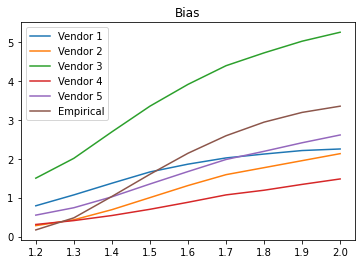

In [9]:
# use datatable to generate a graph of bias values
graph = table.transpose()
graph.plot(title = 'Bias', kind ='line')